<a href="https://colab.research.google.com/github/sneha9730/Credit-Card-Fraud-Detection/blob/main/Credit_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             accuracy_score, classification_report,
                             ConfusionMatrixDisplay, confusion_matrix)
from google.colab import files

In [ ]:
#upload kaggle.json file
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# download the dataset and retrieve the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.13GB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [5]:
# load csv data
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()
# no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#quick check of the sample data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# stats of fraud and non fraud
counts = df['Class'].value_counts()
print(counts)

Class
0    284315
1       492
Name: count, dtype: int64


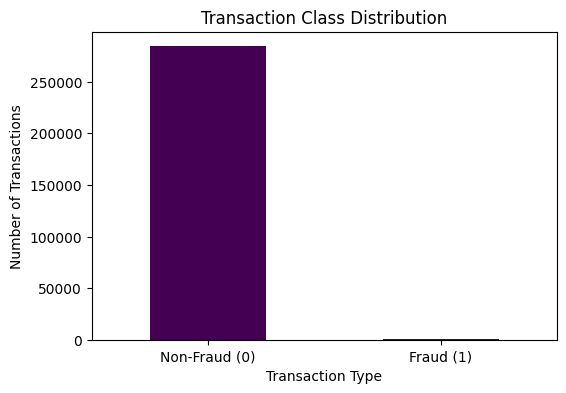

In [9]:
# visualization of stats
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', cmap = 'viridis')
plt.title('Transaction Class Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.show()

The dataset is highly imbalanced with a very small number of fraud transactions compared to non-fraud ones. Additionally, the overall dataset size is large. To address this, only 20% of the non-fraud transactions were considered, resulting in approximately 57,000 records. Despite this reduction, the dataset remains imbalanced but the smaller size allows for more efficient model training while retaining all available fraud cases.

In [10]:
# separate fraud and non-fraud data
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [11]:
# take smaple of non fraud
non_fraud_sample = non_fraud.sample(frac=0.2, random_state=42)

In [12]:
# combine the non fraud sample and fraud data
data = pd.concat([fraud, non_fraud_sample]).sample(frac=1, random_state=42)

In [13]:
data.shape

(57355, 31)

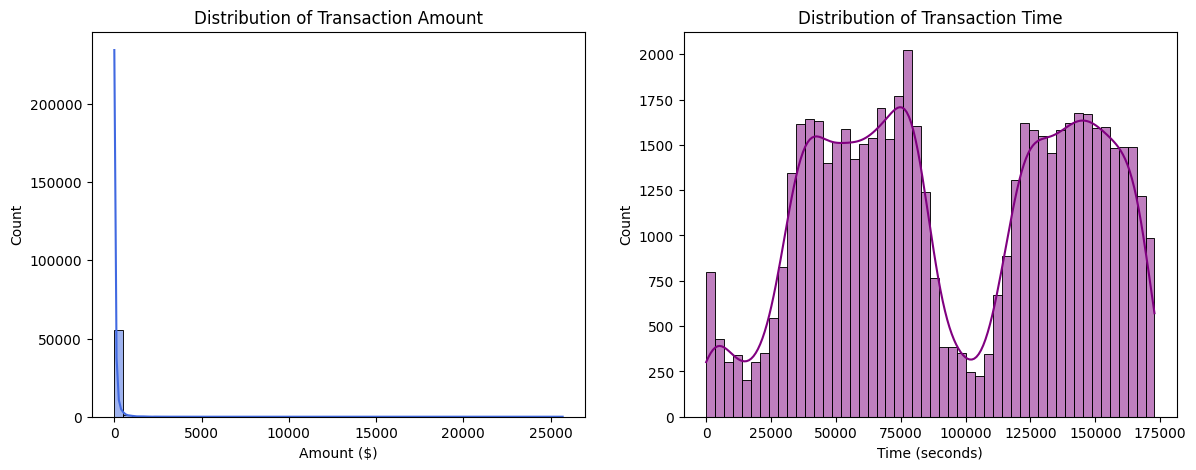

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# transaction amount distribution
sns.histplot(data['Amount'], bins=50, kde=True, color='royalblue', ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlabel('Amount ($)')
ax[0].set_ylabel('Count')

# Transaction Time distribution
sns.histplot(data['Time'], bins=50, kde=True, color='purple', ax=ax[1])
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Count')
plt.show()

In [15]:
# apply standard scaler to amount and time
scaler = StandardScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

In [16]:
# split into train test dataframes
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [17]:
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

### ***AdaBoost***



In [18]:
#train the model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [19]:
# make predictions
ada_preds = ada_model.predict(X_test)
ada_probs = ada_model.predict_proba(X_test)[:, 1]

In [20]:
# display the evaluation metrics
print("Accuracy:", accuracy_score(y_test, ada_preds))
print("Precision:", precision_score(y_test, ada_preds))
print("Recall:", recall_score(y_test, ada_preds))
print("F1 Score:", f1_score(y_test, ada_preds))

Accuracy: 0.996948827477988
Precision: 0.8089887640449438
Recall: 0.8
F1 Score: 0.8044692737430168


In [21]:
print("\nClassification Report:\n", classification_report(y_test, ada_preds))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11381
           1       0.81      0.80      0.80        90

    accuracy                           1.00     11471
   macro avg       0.90      0.90      0.90     11471
weighted avg       1.00      1.00      1.00     11471



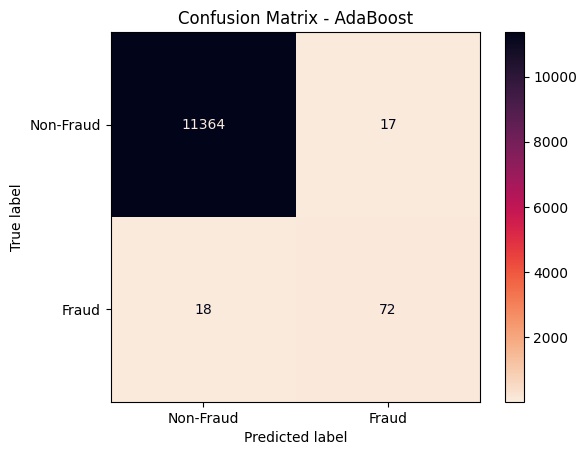

In [22]:
#confusion matrix
cm = confusion_matrix(y_test, ada_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap='rocket_r')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

In [23]:
print("ROC AUC:", roc_auc_score(y_test, ada_probs))

ROC AUC: 0.9792256099346865


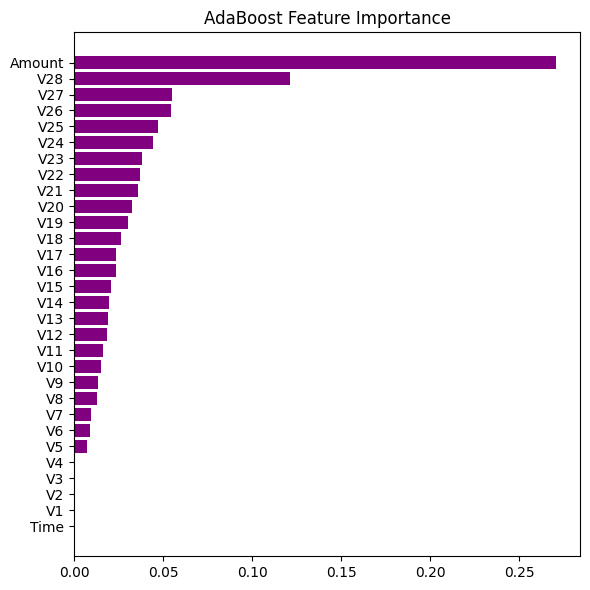

In [24]:
# Feature importance
plt.figure(figsize=(6, 6))
plt.barh(X_train.columns, np.sort(ada_model.feature_importances_),color = 'purple')
plt.title("AdaBoost Feature Importance")
plt.tight_layout()
plt.show()

Adaboost is lightweight and easy to train and has a goos accuracy a ROC. But, it's precision, recall and f1 score falls short compared to others. Adsitionally, the most important feature is Amount.

### ***XGBoost***

In [25]:
# train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [26]:
#predict the model
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

In [27]:
# displaying the evaluation metrics
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))

Accuracy: 0.9982564728445645
Precision: 0.9605263157894737
Recall: 0.8111111111111111
F1 Score: 0.8795180722891566


In [28]:
print("\nClassification Report:\n", classification_report(y_test, xgb_preds))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11381
           1       0.96      0.81      0.88        90

    accuracy                           1.00     11471
   macro avg       0.98      0.91      0.94     11471
weighted avg       1.00      1.00      1.00     11471



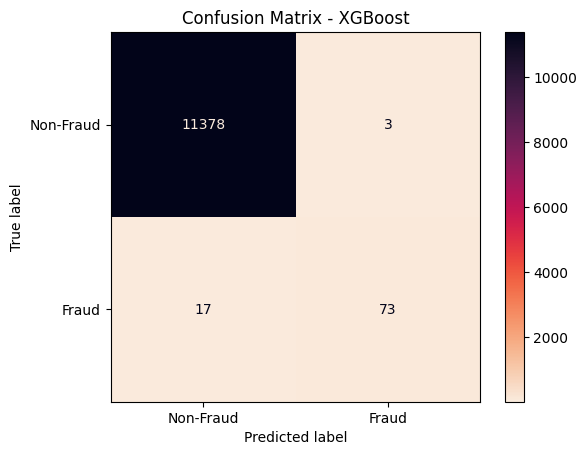

In [29]:
#confusion matrix
cm = confusion_matrix(y_test, xgb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap='rocket_r')
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [30]:
print("F1 Score:", f1_score(y_test, xgb_preds))

F1 Score: 0.8795180722891566


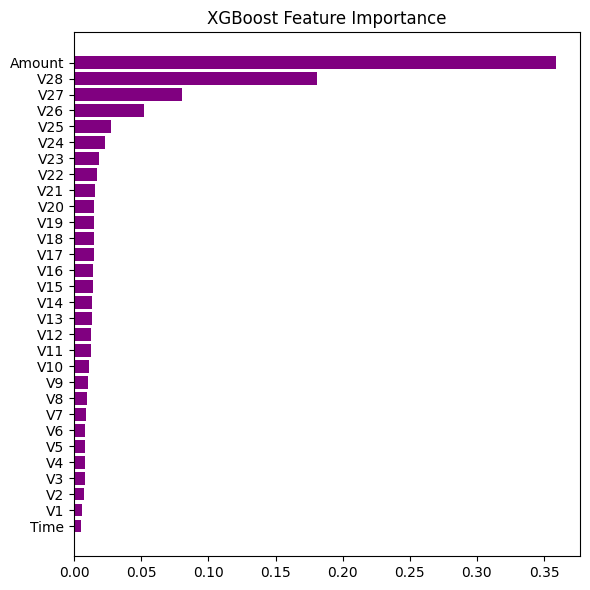

In [31]:
# Feature importance
plt.figure(figsize=(6, 6))
plt.barh(X_train.columns, np.sort(xgb_model.feature_importances_), color ='purple')
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

XGBoost is efficient and powerful. It does well in predicting the frauds and has a moderately high ROC.Its recall and f1 score falls behind but it could be optimized for real time applications. The most important feature is Amount.

### ***Decision Tree***

In [32]:
# train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
#predict the model
tree_preds = tree_model.predict(X_test)
tree_probs = tree_model.predict_proba(X_test)[:, 1]

In [34]:
# displaying the evaluation metrics
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("Precision:", precision_score(y_test, tree_preds))
print("Recall:", recall_score(y_test, tree_preds))
print("F1 Score:", f1_score(y_test, tree_preds))

Accuracy: 0.9962514166158138
Precision: 0.7422680412371134
Recall: 0.8
F1 Score: 0.7700534759358288


In [35]:
print("\nClassification Report:\n", classification_report(y_test, tree_preds))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11381
           1       0.74      0.80      0.77        90

    accuracy                           1.00     11471
   macro avg       0.87      0.90      0.88     11471
weighted avg       1.00      1.00      1.00     11471



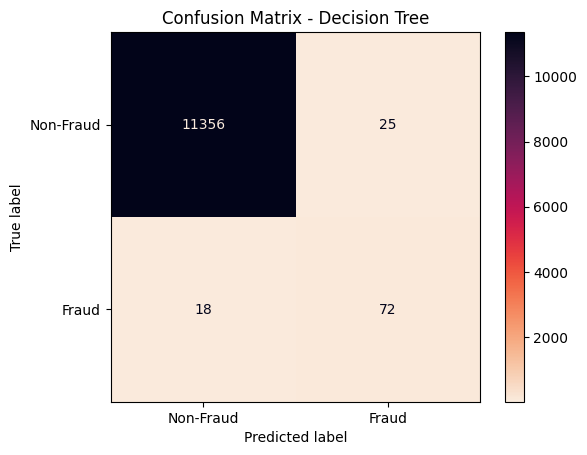

In [36]:
# confusion matrix
cm = confusion_matrix(y_test, tree_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap='rocket_r')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [37]:
print("ROC AUC:", roc_auc_score(y_test, tree_probs))

ROC AUC: 0.8989016782356559


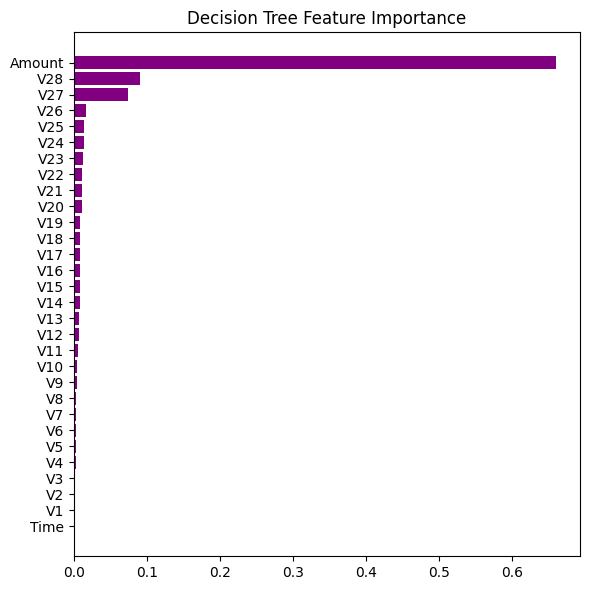

In [38]:
# Feature importance
plt.figure(figsize=(6, 6))
plt.barh(X_train.columns, np.sort(tree_model.feature_importances_), color= "purple")
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()

Though having a high accuracy decision tree doesnt perform well as intended. It works poorly when detecting frauds. This model's decision mostly depends upon Amount which might be a reason for its poor classification. Its simple and easy to understand but not as relible to catch frauds like other models

### ***Random Forest***

In [39]:
# train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
#predict the model
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [41]:
# display the evaluation metrics
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))

Accuracy: 0.9984308255601081
Precision: 0.9615384615384616
Recall: 0.8333333333333334
F1 Score: 0.8928571428571429


In [42]:
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11381
           1       0.96      0.83      0.89        90

    accuracy                           1.00     11471
   macro avg       0.98      0.92      0.95     11471
weighted avg       1.00      1.00      1.00     11471



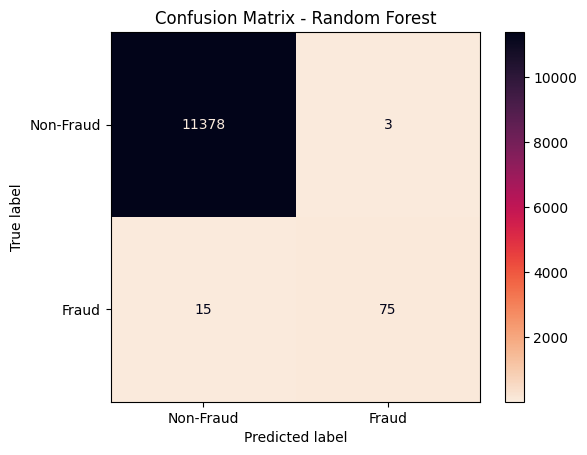

In [43]:
#confusion matrix
cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap='rocket_r')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [44]:
print("ROC AUC:", roc_auc_score(y_test, rf_probs))

ROC AUC: 0.9740962032236965


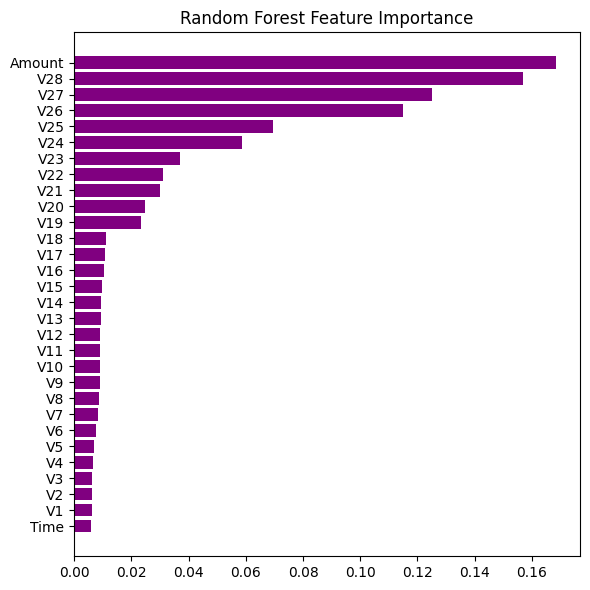

In [45]:
# feature importance
plt.figure(figsize=(6, 6))
plt.barh(X_train.columns, np.sort(rf_model.feature_importances_),color = 'purple')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

Unlike other models whose decision making feature was Amount but in Random Forest maany features are responsible to detect whether a transaction is fraudulent. It has a high accuracy, roc and precision with moderately high recall and f1 score. It can be assumed that Random Forest is the best model among all but it has it takes alot of time to train.